# Week 10 Activity
*Sreehari P S*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./datasets/employee.csv')
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
df.shape

(9, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


There is not null values in name column so good to make it as index

In [5]:
df.groupby('gender')['name'].count()

gender
F    5
M    2
Name: name, dtype: int64

Identity of 2 members is unknown.

### 2. Reset the index as "name" as the index.

In [6]:
df.set_index('name', inplace= True)
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [7]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [8]:
df[df['department'].isin(['Sales','Finance'])].sort_values(by= 'grade',ascending=False)

,age,income,gender,department,grade,performance_score
name,,,,,,
Leo Duck,23.0,98000.0,M,Sales,G4,709
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Jack Morgan,32.0,35000.0,M,Finance,G2,674
S Kumar,NaN,16000.0,F,Finance,G0,520


### 5. Display employee who has more than 700 performance score.

In [9]:
df[df.performance_score>700].sort_values(by= 'performance_score',ascending=True)

,age,income,gender,department,grade,performance_score
name,,,,,,
Leo Duck,23.0,98000.0,M,Sales,G4,709
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 6. Display employee who has more than 500 and less than 700 performance score

In [10]:
df[df.performance_score.between(500,700)].sort_values(by= 'performance_score',ascending=True)

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Jack Morgan,32.0,35000.0,M,Finance,G2,674


### 7. Check and handle missing values in the dataset.

In [11]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [12]:
print("Number of NAN rows = ",df.isna().any(axis=1).sum())
df[df.isna().any(axis=1)]

Number of NAN rows =  4


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53


From the dataset it is clear we have 4 candidates with missing values.<br>
Since **Gender** cannot be filled considering other attributes we drop rows with gender is null

In [13]:
df_new = df.drop(df[df['gender'].isna()].index)

In [14]:
df_new

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [15]:
print('Shape after drop = ',df_new.shape)

Shape after drop =  (7, 6)


(array([1., 0., 2., 0., 0., 0., 0., 1., 0., 2.]),
 array([23. , 26.1, 29.2, 32.3, 35.4, 38.5, 41.6, 44.7, 47.8, 50.9, 54. ]),
 <BarContainer object of 10 artists>)

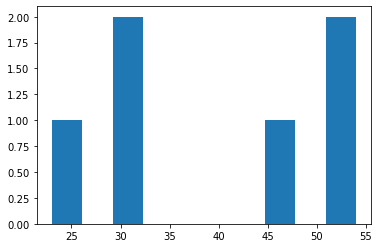

In [16]:
plt.hist(df_new['age'])

In [17]:
#Filing age by median
df_new['age'].fillna(float(df_new['age'].median()), inplace = True)
df_new

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,38.5,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [18]:
#Filing income by average
df_new['income'].fillna(round(df_new['income'].mean(),2), inplace = True)
df_new

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,38.5,16000.00,F,Finance,G0,520
Jack Morgan,32.0,35000.00,M,Finance,G2,674
Ying Chin,45.0,65000.00,F,Sales,G3,556
Dheeraj Patel,30.0,42000.00,F,Operations,G2,711
James Authur,54.0,51333.33,F,Operations,G3,53
Josh Wills,54.0,52000.00,F,Finance,G3,901
Leo Duck,23.0,98000.00,M,Sales,G4,709


### 8. Check the outliers and handle outliers in performance score using Percentiles.


In [19]:
def find_outliers(series):
    Q1 = np.percentile(series, 25, interpolation = 'midpoint')
    Q2 = np.percentile(series, 50, interpolation = 'midpoint')
    Q3 = np.percentile(series, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5*IQR
    up_lim = Q3 + 1.5*IQR
    print(f'Upper limit = {up_lim} and Lower limit = {low_lim}')
    outlier_list = []
    for x in series:
        if((x>up_lim) or (x<low_lim)):
            outlier_list.append(x)
    print(f'Outliers for {series.name} = {outlier_list}')
    return outlier_list

In [20]:
#plt.boxplot(df_new['income'])
#plt.show()

In [21]:
income_outliers = find_outliers(df_new['income'])
#df_new.loc[income_outliers].index
income_outliers

Upper limit = 88500.0 and Lower limit = 8500.0
Outliers for income = [98000.0]


[98000.0]

In [22]:
performance_outliers = find_outliers(df_new['performance_score'])
index = df_new[df['performance_score'].isin(performance_outliers)].index
df_new.drop(index, inplace = True)

Upper limit = 968.0 and Lower limit = 280.0
Outliers for performance_score = [53]


C:\Users\sreeh\AppData\Local\Temp/ipykernel_11656/2767631287.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index = df_new[df['performance_score'].isin(performance_outliers)].index


In [23]:
df_new

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,38.5,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 9. Check the gender column and do Dummy encoding.

In [24]:
df_new['gender']

name
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [25]:
df_encoded = pd.get_dummies(data = df_new, columns=['gender'])

In [26]:
df_encoded

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
S Kumar,38.5,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


### 10.Do the standard scaling on the feature performance score.

In [27]:
from sklearn import preprocessing

In [28]:
df_encoded.describe()

,age,income,performance_score,gender_F,gender_M
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,37.083333,51333.333333,678.500000,0.666667,0.333333
std,11.182203,28168.540372,135.382052,0.516398,0.516398
min,23.000000,16000.000000,520.000000,0.000000,0.000000
25%,30.500000,36750.000000,585.500000,0.250000,0.000000
50%,35.250000,47000.000000,691.500000,1.000000,0.000000
75%,43.375000,61750.000000,710.500000,1.000000,0.750000
max,54.000000,98000.000000,901.000000,1.000000,1.000000


In [29]:
standard_scalar = preprocessing.StandardScaler()

In [30]:
df_encoded[['performance_score']] = standard_scalar.fit_transform(df_encoded[['performance_score']])

In [31]:
df_encoded

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
S Kumar,38.5,16000.0,Finance,G0,-1.282504,1,0
Jack Morgan,32.0,35000.0,Finance,G2,-0.036412,0,1
Ying Chin,45.0,65000.0,Sales,G3,-0.991210,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,0.262974,1,0
Josh Wills,54.0,52000.0,Finance,G3,1.800361,1,0
Leo Duck,23.0,98000.0,Sales,G4,0.246791,0,1


In [32]:
df_encoded.describe()

,age,income,performance_score,gender_F,gender_M
count,6.000000,6.000000,6.000000e+00,6.000000,6.000000
mean,37.083333,51333.333333,-4.163336e-17,0.666667,0.333333
std,11.182203,28168.540372,1.095445e+00,0.516398,0.516398
min,23.000000,16000.000000,-1.282504e+00,0.000000,0.000000
25%,30.500000,36750.000000,-7.525104e-01,0.250000,0.000000
50%,35.250000,47000.000000,1.051896e-01,1.000000,0.000000
75%,43.375000,61750.000000,2.589283e-01,1.000000,0.750000
max,54.000000,98000.000000,1.800361e+00,1.000000,1.000000
